In [1]:
# Importar librerias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# HOLT-WINTERS ADITIVO
### Involucra la presencia de nivel, tendencia y estacionalidad (heterocedasticidad)

In [2]:
df = pd.read_csv('data/airline_passengers.csv', index_col='Month', parse_dates=True)
df.head()

,Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [5]:
df.index.freq = 'MS'

In [10]:
n_test = 12
periodos = 12
train = df.iloc[:-n_test]
test = df.iloc[-n_test:]

In [15]:
# Vector booleano de df donde me indica que parte del df pertenece a train y a test
train_idx = df.index <= train.index[-1]
test_idx = df.index > train.index[-1]

In [12]:
# Crear un objeto para caso aditivo
holt_winters = ExponentialSmoothing(train['Passengers'],
                                    initialization_method='legacy-heuristic',
                                    trend = 'add', 
                                    seasonal = 'add',
                                    seasonal_periods = periodos)

In [13]:
# Obtener los resulados con parametros optimizados
res = holt_winters.fit()

In [16]:
df.loc[train_idx, 'HW_add'] = res.fittedvalues
df.loc[test_idx, 'HW_add']  = res.forecast(n_test)

<Axes: xlabel='Month'>

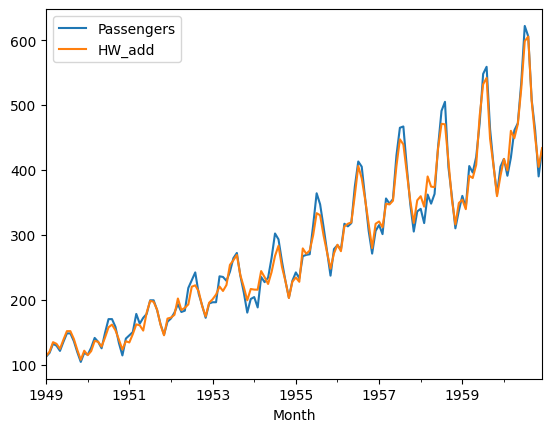

In [17]:
df[['Passengers', 'HW_add']].plot()

# HOLT-WINTERS ADITIVO con estacionalidad MULTIPLICATIVA
### Involucra la presencia de nivel, tendencia y estacionalidad (homocedasticidad)

In [ ]:
holt_winters_2 = 